<a href="https://colab.research.google.com/github/Sahilpardeshi1/Netflix-movies-and-Tv-shows/blob/main/Copy_of_Netflix_movies_and_TV_shows_clustering_sahil_pardeshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**INTRODUCTION**
**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

 **Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

# **Attribute Information**

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# checking for duplicate values

duplicate_values = df.duplicated().sum()
print(f'The total number of duplicate values are {duplicate_values}')

The total number of duplicate values are 0


Observation:
The given dataset has no duplicate values.

In [ ]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

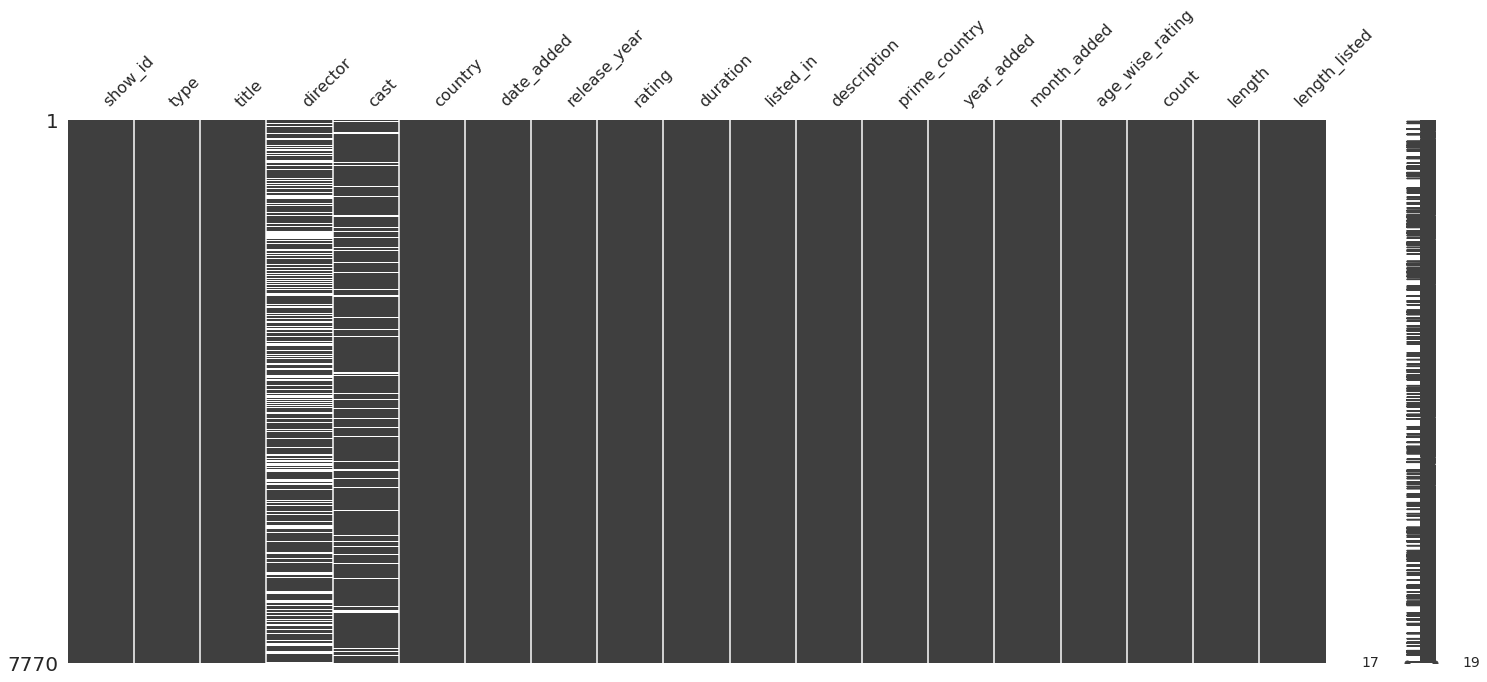

In [82]:
import missingno as msno
msno.matrix(df)

In [ ]:
for i in df.columns:
    null_percentage = df[i].isna().sum() / len(df) * 100 
    if null_percentage > 0 :
        print("'{}' column null percentage :{}%".format(i,round(null_percentage,2)))

'director' column null percentage :30.68%
'cast' column null percentage :9.22%
'country' column null percentage :6.51%
'date_added' column null percentage :0.13%
'rating' column null percentage :0.09%


Observation:
director column has highest percentage of null values whereas the 'rating' and 'date added' column has less than 1% percentage of null values.

In [ ]:
#lets drop null values in rating and date added as their are very few number of null values

df.dropna(subset=['rating', 'date_added'],inplace = True)

In [ ]:
#filling the null values of country with its mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# as we can see country column has multiple countries in it so we will create a new column containing only one country 

df['prime_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['prime_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: prime_country, dtype: object

In [ ]:
df.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
prime_country    object
dtype: object

In [ ]:
# adding month_added and year_added in the column for better understanding 

df['year_added'] =df['date_added'].apply(lambda x: x.split(" ")[-1])
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])

In [ ]:
#lets convert the category accourding to age wise for better understanding and thus making eda more interpretable 
age_wise_rating = {   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

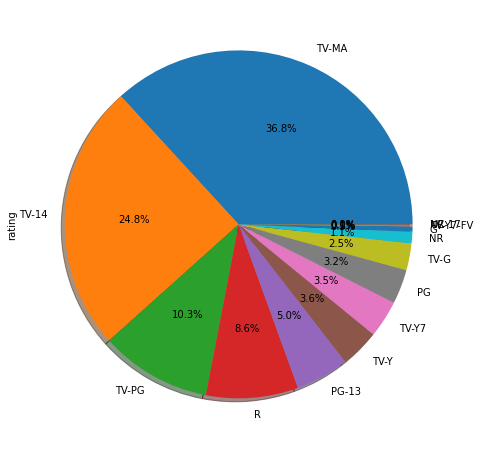

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [ ]:
#replacing the values
df['age_wise_rating'] = df['rating'].replace(age_wise_rating)

In [ ]:
df['age_wise_rating'].value_counts()

Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: age_wise_rating, dtype: int64

In [ ]:
# converting the 'type' ,'age_wise_rating' column into categorical type and 'year_added' to numeric data type
df['type'] = pd.Categorical(df['type'])

In [ ]:
df['age_wise_rating'] = pd.Categorical(df['age_wise_rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults' ])

In [ ]:
df['year_added'] = pd.to_numeric(df['year_added'])

## EDA

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,age_wise_rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,Teens


In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

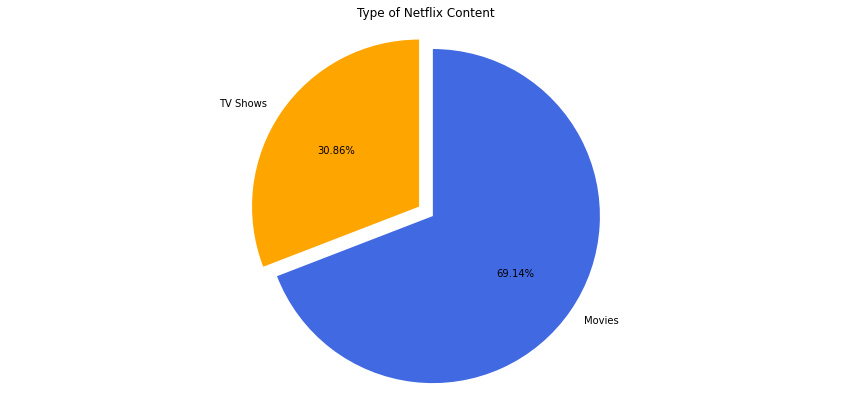

In [ ]:
plt.figure(figsize=(15, 7))
labels=['TV Shows', 'Movies']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0],
        autopct='%1.2f%%',colors=['orange','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Observation:

Percentae of movies is way greater than TV-shows on netflix.

Nearly 70% of the content is of type- Movies whereas the rest 30% is TV-shows.

There are 5372 movies and 2398 TV-shows available on netflix.

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [ ]:
# plotting the content added over the years

df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

#percent of Tv show 
df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))

#percent of Movie
df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))


t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="gold"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Observation:

Netflix has been adding more number of movies then Tv shows since year 2016.

2019 is the year of maximum movies released on netflix. A total of 1497 movies were added during this year.

Max number of Tv shows were added during the year 2020. 697 Tv shows are released during this year.

In [ ]:
# listing top 10 countries based on netflix popularity
top_countries = df['prime_country'].value_counts()[0:10]
top_countries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object')

Text(0, 0.5, 'Country Name')

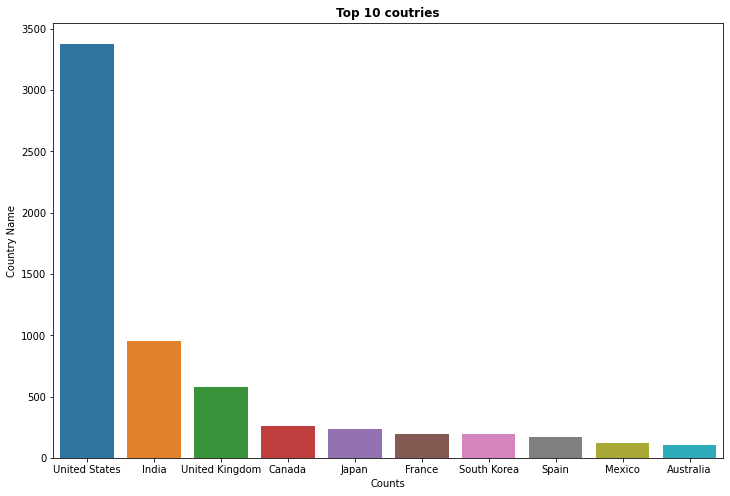

In [ ]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='prime_country',lw=2,data=df,
              order=df['prime_country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

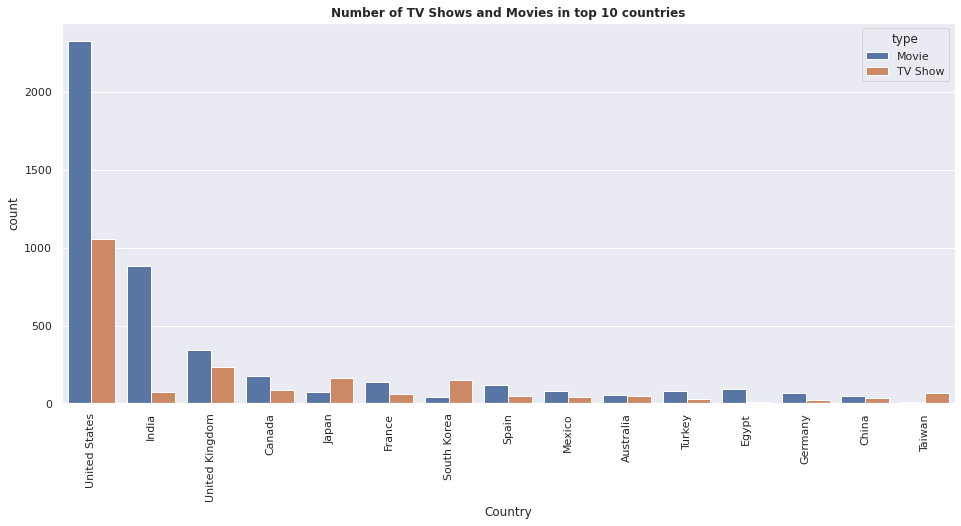

In [ ]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(16,7))
ax=sns.countplot(x="prime_country",data= df,hue= "type",order = df['prime_country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold")
plt.show()

Netflix is most popular in United States

India and UK falls at second and third place respectively in the popularity list.

The majority of content on netflix in India is comprised of Movies where as majority of content in South Korea is comprised of TV shows.

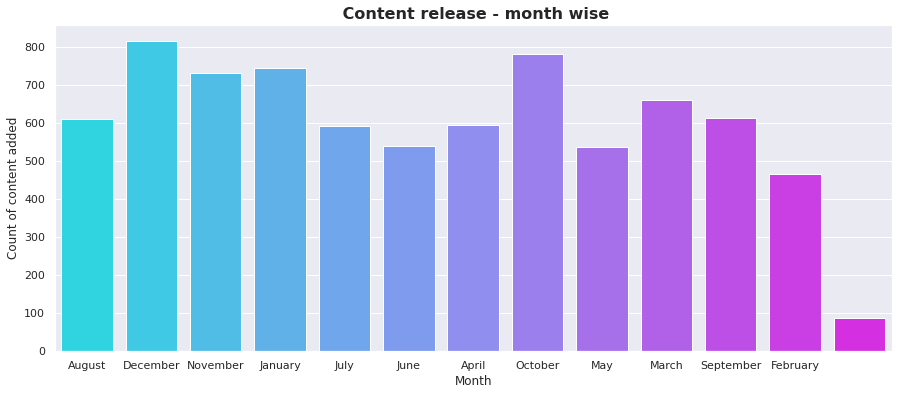

In [ ]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df,palette="cool")

plt.title(' Content release - month wise',size='16',fontweight="bold")    
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

Maximum content is added during the end of the year.

Least amount of content is added during the mid year months like May june and july

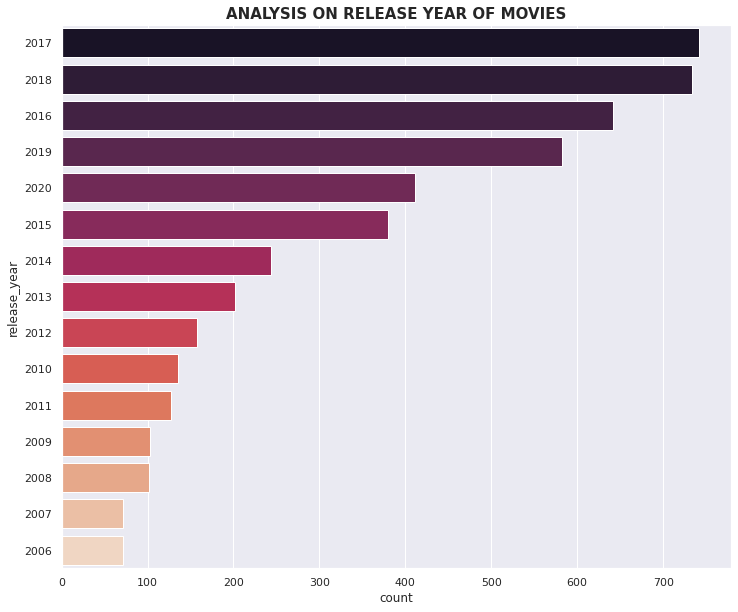

In [ ]:
#plotting release year of movies
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="rocket", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

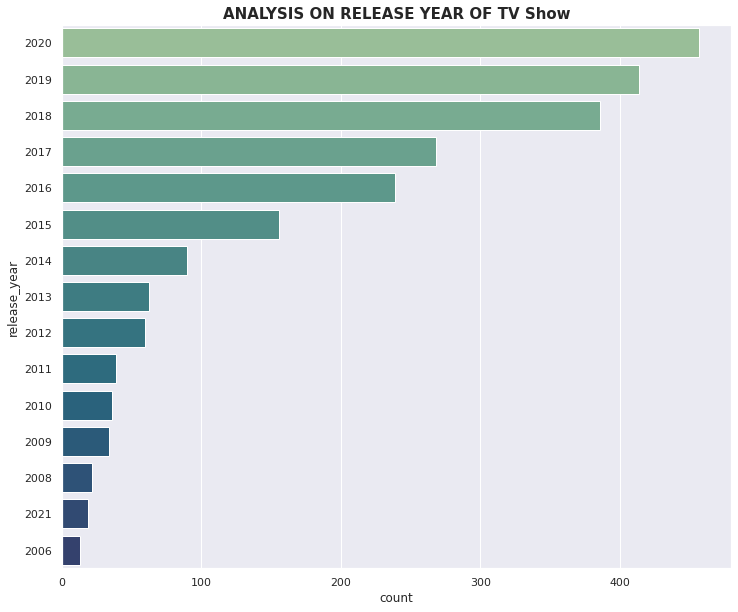

In [ ]:
#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="crest", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

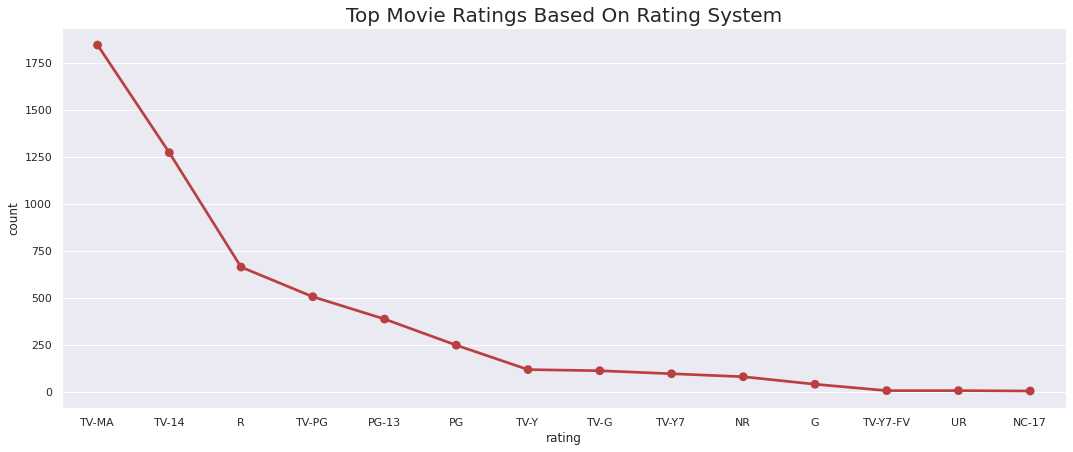

In [ ]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings,color="#bb3f3f")
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

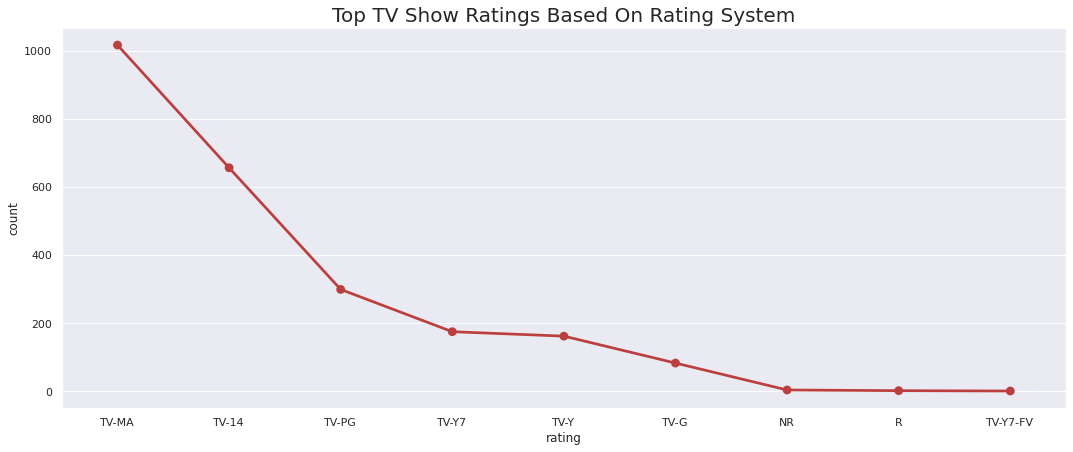

In [ ]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings,color="#bb3f3f")
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

Movies and TV-shows belonging to 'TV-MA' rating are highest on netflix. It is for Mature audience only i.e. viewed by adults and therefore may be unsuitable for children under 17

The second most popular rating is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.

The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian

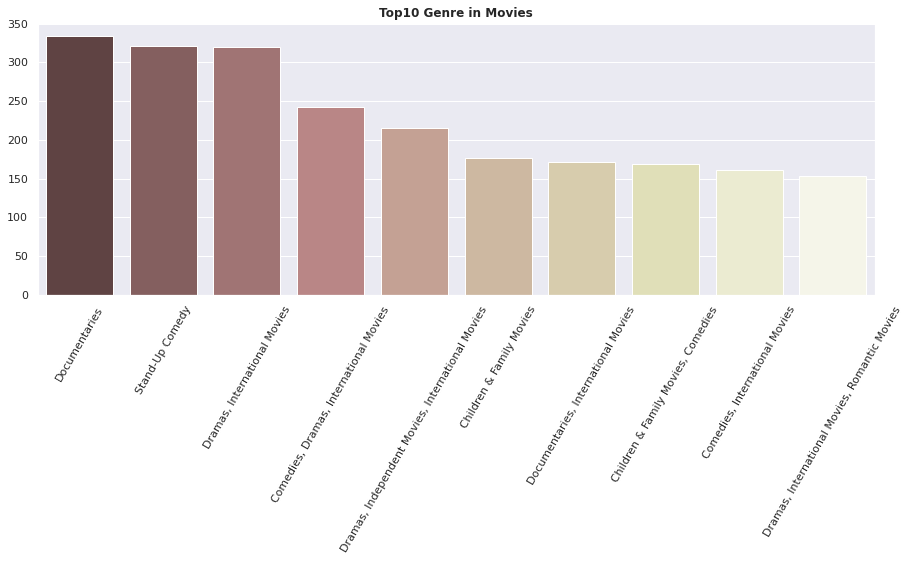

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

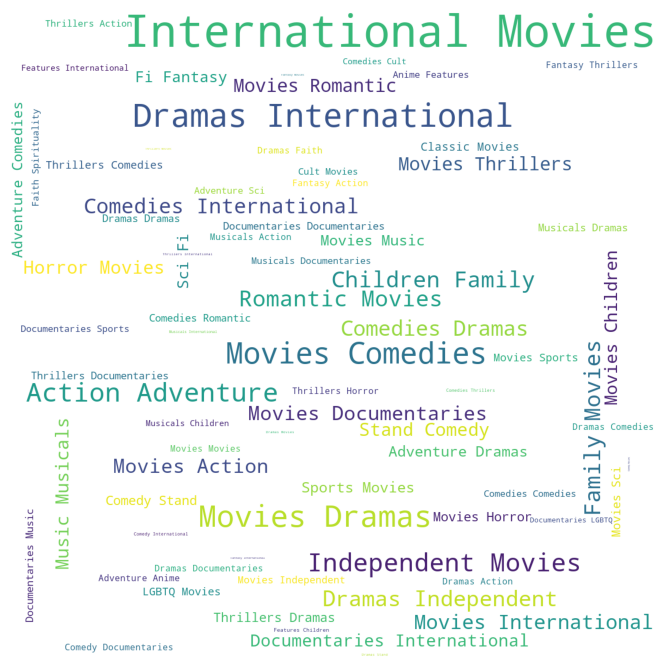

In [ ]:
#Wordcloud for the movies
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

International movies, dramas and comedies are top 3 genres in movies on netflix.

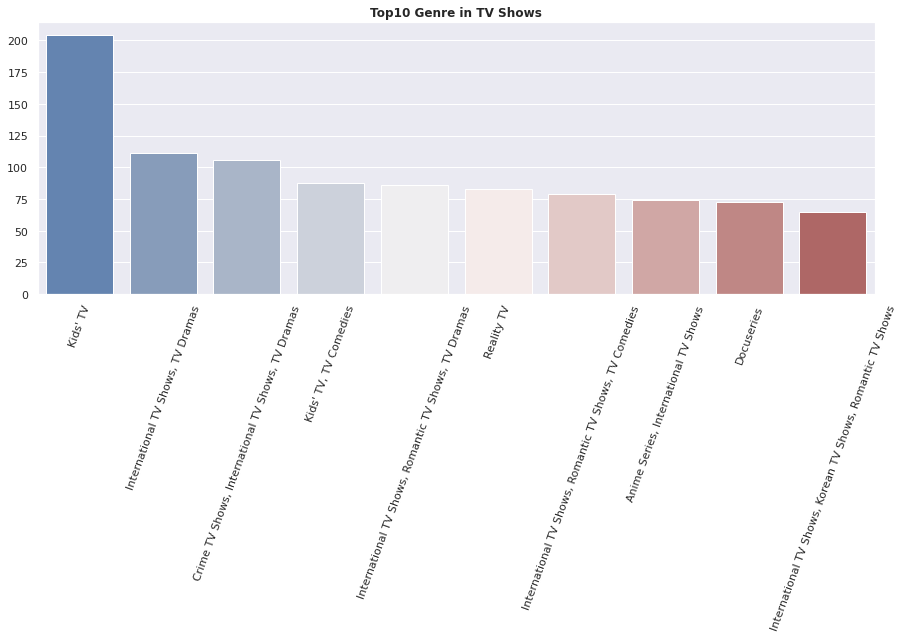

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

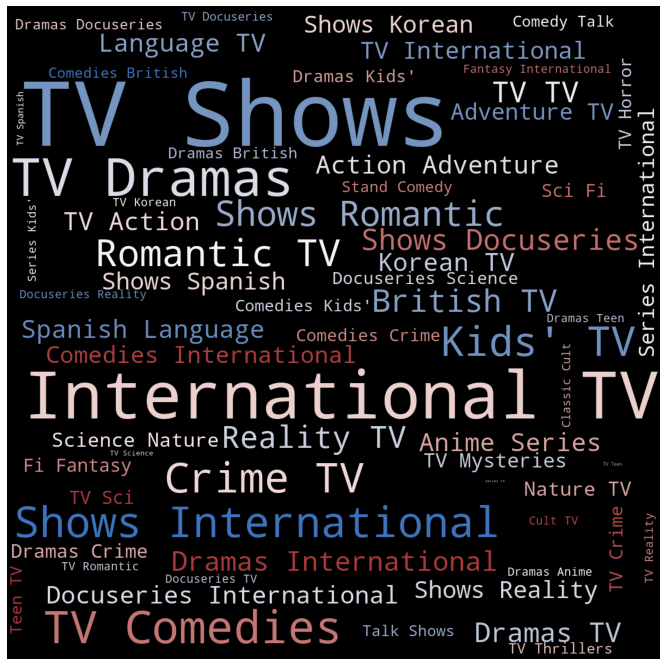

In [ ]:
#PLotting on wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Internatinal TV shows, Comedies and drama are top 3 genres in tv shows on netflix.

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('prime_country')[['prime_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['prime_country']


df_heatmap = df.loc[df['prime_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['prime_country'],df_heatmap['age_wise_rating'],normalize = "index").T
df_heatmap

prime_country,Canada,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
age_wise_rating,,,,,,,,,,
Kids,0.150579,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.009434,0.078125,0.089080
Older Kids,0.220077,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.094340,0.184028,0.202131
Teens,0.162162,0.173469,0.561715,0.348936,0.130081,0.365979,0.113095,0.349057,0.211806,0.245635
Adults,0.467181,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.547170,0.526042,0.463155


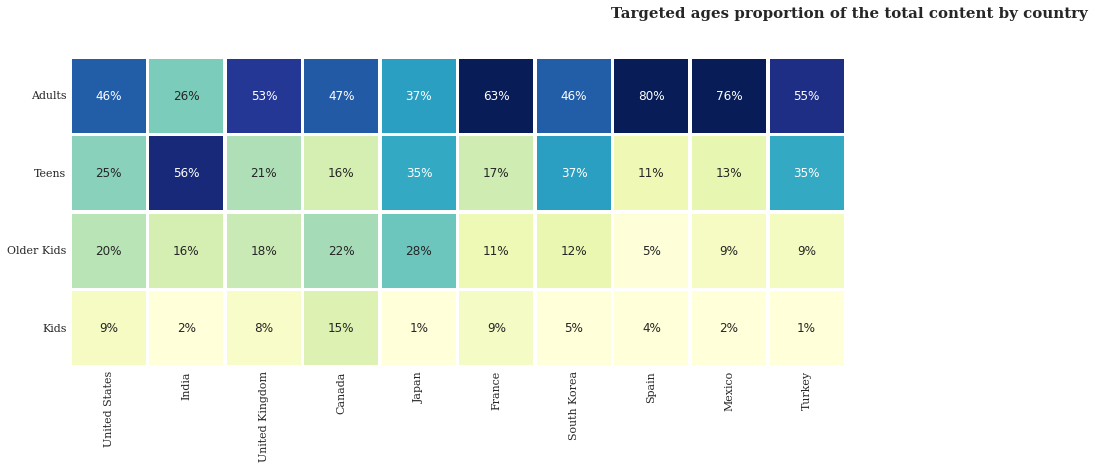

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Turkey']

age_order = ['Adults', 'Teens',  'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Targeted ages proportion of the total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='center')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Observations:

Content developed by netflix moslty target teen. 56% of content is for teen which is highest as compared to any other country.

Content developed by netflix in Spain, Mexico and France is mostly for adults.



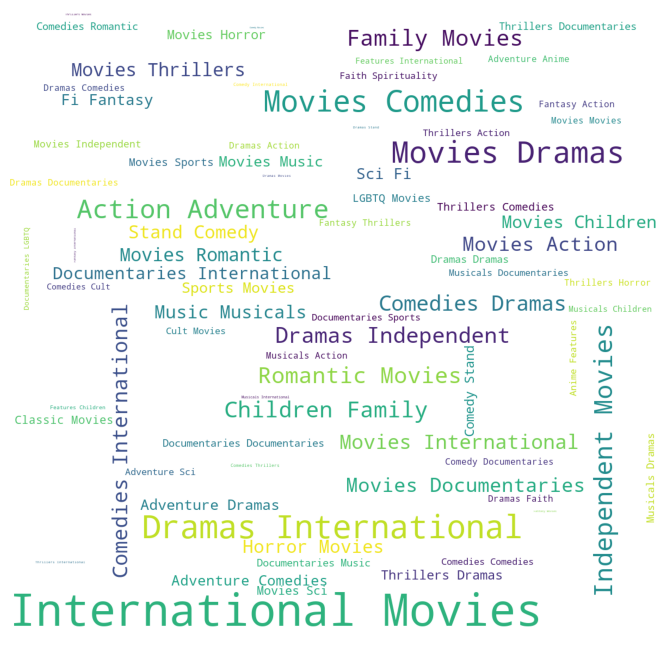

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

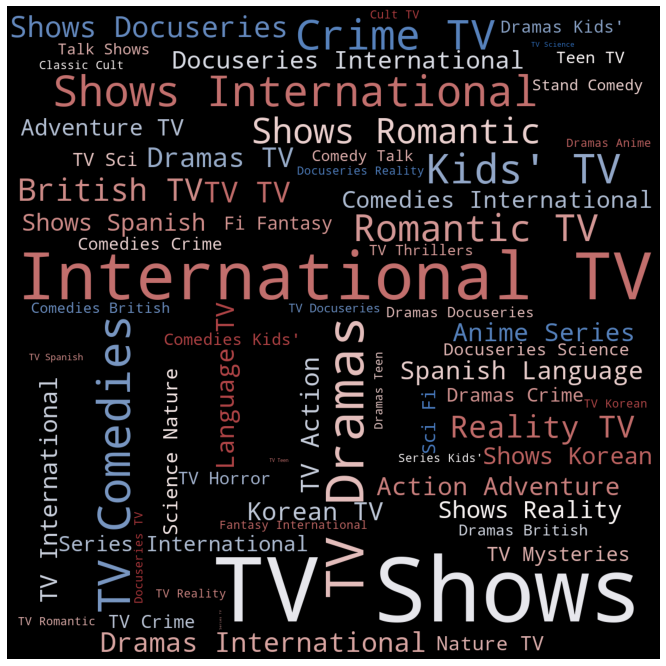

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#groupby country and Ratings feature
content_in_different_countries=df.groupby(['prime_country','rating']).count().reset_index()


In [ ]:
import plotly.express as px
(px.bar(content_in_different_countries, x="rating",y="prime_country", color="prime_country")
.update_layout(title_font_size=200)
.update_xaxes(showgrid=False)
).show()

## Data Preprocessing

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
#looking at description and listed_in columns
print(df['description'][0:11])
print('-'*70)
print(df['listed_in'][0:11])

0     In a future where the elite inhabit an island ...
1     After a devastating earthquake hits Mexico Cit...
2     When an army recruit is found dead, his fellow...
3     In a postapocalyptic world, rag-doll robots hi...
4     A brilliant group of students become card-coun...
5     A genetics professor experiments with a treatm...
6     After an awful accident, a couple admitted to ...
7     After one of his high school students attacks ...
8     When a doctor goes missing, his psychiatrist w...
9     An architect and his wife move into a castle t...
10    A farmer pens a confession admitting to his wi...
Name: description, dtype: object
----------------------------------------------------------------------
0     International TV Shows, TV Dramas, TV Sci-Fi &...
1                          Dramas, International Movies
2                   Horror Movies, International Movies
3     Action & Adventure, Independent Movies, Sci-Fi...
4                                                Dramas


In [ ]:
# making the description column lowercase
df['description'] = df['description'].str.lower()
df['listed_in'] = df['listed_in'].str.lower()

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

In [ ]:
# removing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [ ]:
#defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df['description'] = df['description'].apply(stopwords)
df['listed_in'] = df['listed_in'].apply(stopwords)

#**TF-IDF VECTORIZER**

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

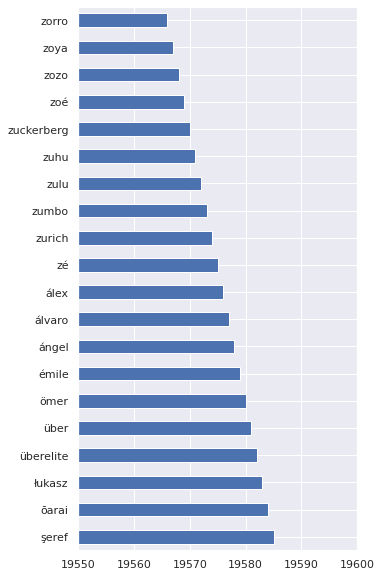

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (19550, 19600))

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem

tv                 41
thrillers          40
teen               39
talk               38
standup            37
sports             36
spirituality       35
spanishlanguage    34
shows              33
series             32
scifi              31
science            30
romantic           29
reality            28
nature             27
mysteries          26
musicals           25
music              24
movies             23
lgbtq              22
korean             21
kids               20
international      19
independent        18
horror             17
features           16
fantasy            15
family             14
faith              13
dramas             12
docuseries         11
documentaries      10
cult                9
crime               8
comedy              7
comedies            6
classic             5
children            4
british             3
anime               2
adventure           1
action              0
dtype: int64

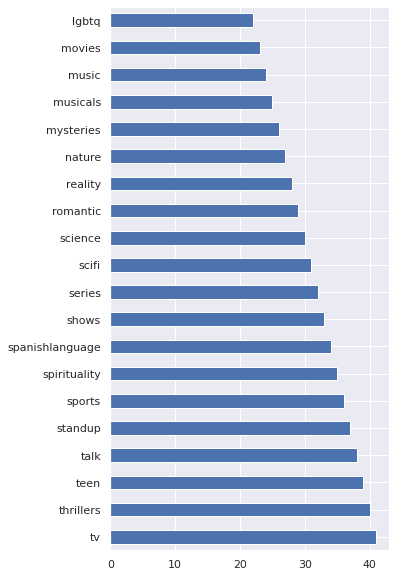

In [ ]:
#plotting top words
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#applying the stemmer to the description column
df['description'] = df['description'].apply(stemming)
df['listed_in'] = df['listed_in'].apply(stemming)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,age_wise_rating,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Brazil,2020,August,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Mexico,2016,December,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Singapore,2018,December,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,United States,2017,November,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,United States,2020,January,Teens,1


In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# collect the vocabulary items used in the vectorizer
dictionary_listed_in = tfid_vectorizer.vocabulary_.items()

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
df['length'] = df['description'].apply(length)
df['length_listed'] = df['listed_in'].apply(length)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,age_wise_rating,count,length,length_listed
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Brazil,2020,August,Adults,1,82,40
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Mexico,2016,December,Adults,1,88,17
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Singapore,2018,December,Adults,1,102,23
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,United States,2017,November,Teens,1,89,43
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,United States,2020,January,Teens,1,99,5


## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_for_clusterring =df[['length','length_listed']]
scaler_method =preprocessing.StandardScaler()
final_feature =scaler_method.fit_transform(features_for_clusterring) 
X=final_feature
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.33664276810569016
For n_clusters = 3, silhouette score is 0.34862931326840524
For n_clusters = 4, silhouette score is 0.31920091110698373
For n_clusters = 5, silhouette score is 0.30805664221381174
For n_clusters = 6, silhouette score is 0.3268437897136797
For n_clusters = 7, silhouette score is 0.3253343520127376
For n_clusters = 8, silhouette score is 0.3212839861535441
For n_clusters = 9, silhouette score is 0.3219875493716867
For n_clusters = 10, silhouette score is 0.32163092849055547


For n_clusters = 2 The average silhouette_score is : 0.3367875569876181
For n_clusters = 3 The average silhouette_score is : 0.3481431878723329
For n_clusters = 4 The average silhouette_score is : 0.3207442149237176
For n_clusters = 5 The average silhouette_score is : 0.3079420368105537
For n_clusters = 6 The average silhouette_score is : 0.32881670294216747
For n_clusters = 7 The average silhouette_score is : 0.3303332658812144
For n_clusters = 8 The average silhouette_score is : 0.32086474097662543
For n_clusters = 9 The average silhouette_score is : 0.3258331644784623
For n_clusters = 10 The average silhouette_score is : 0.32183497342458306


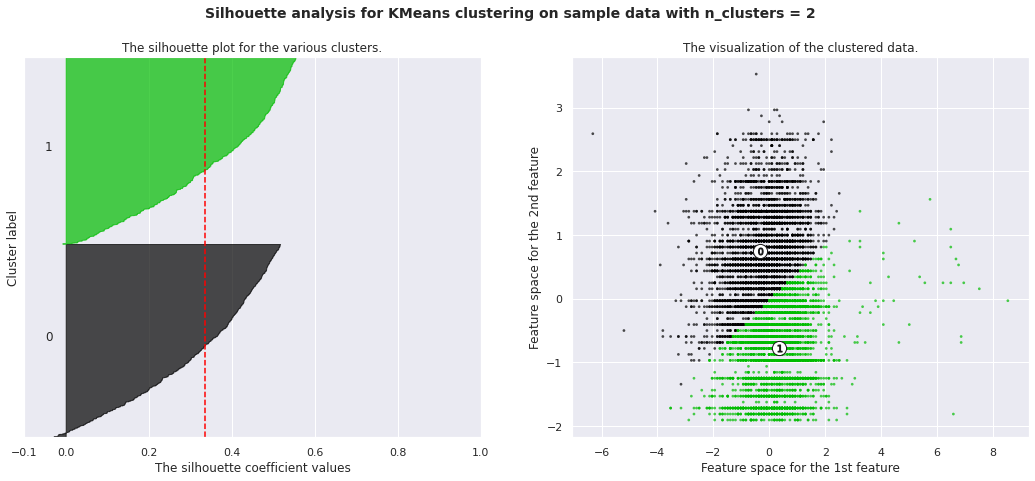

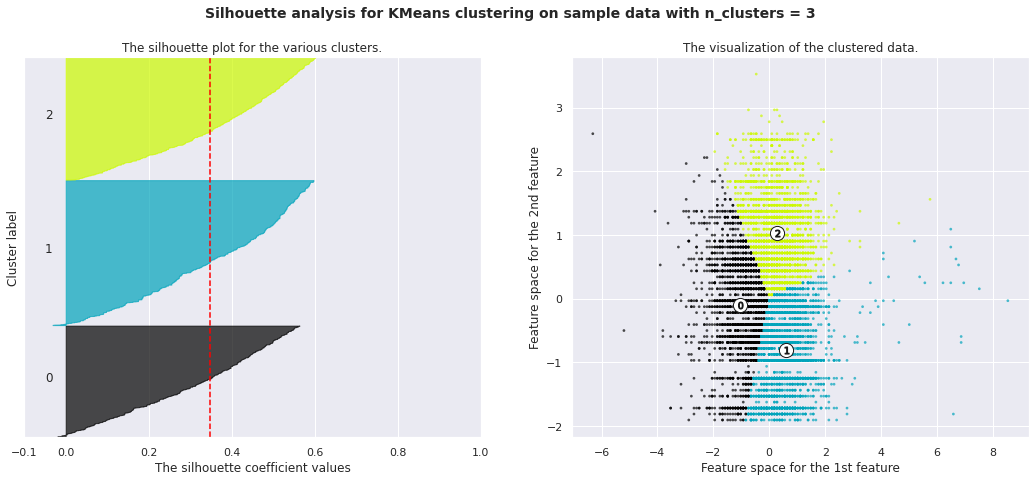

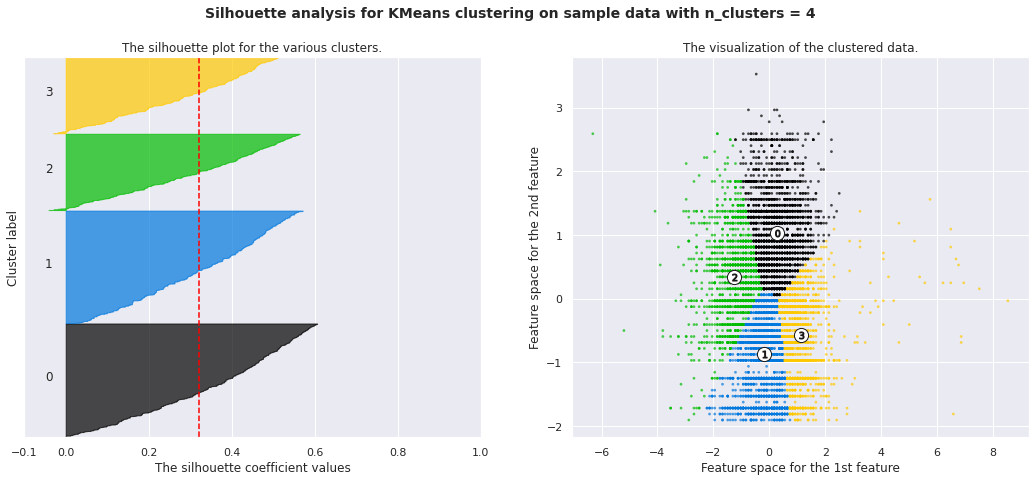

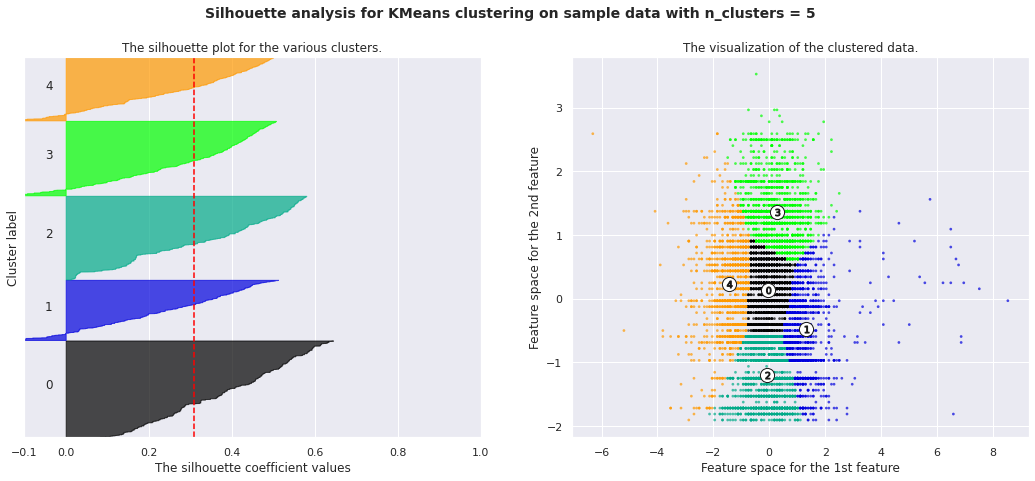

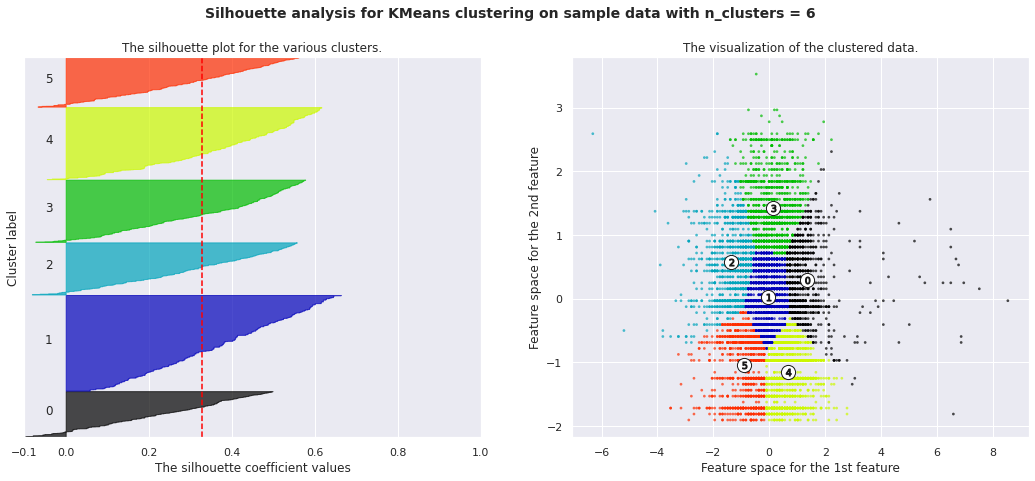

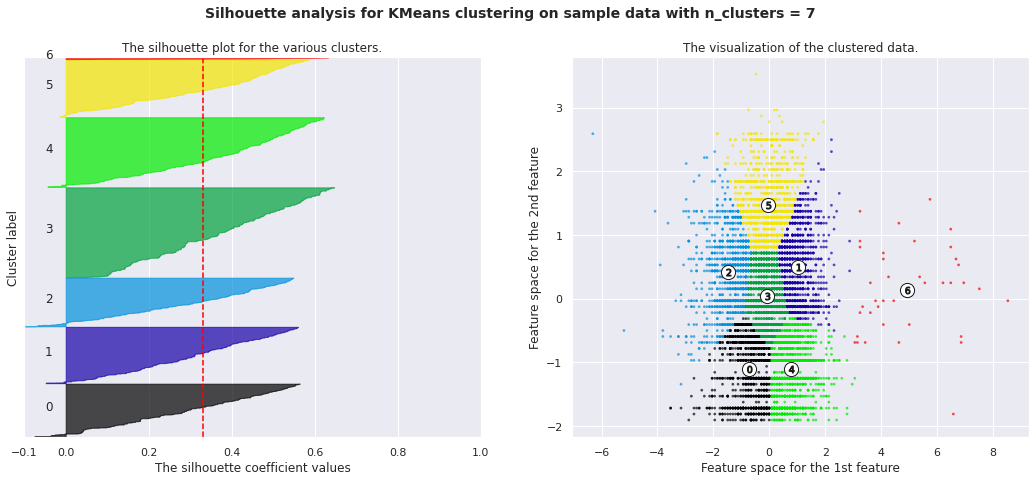

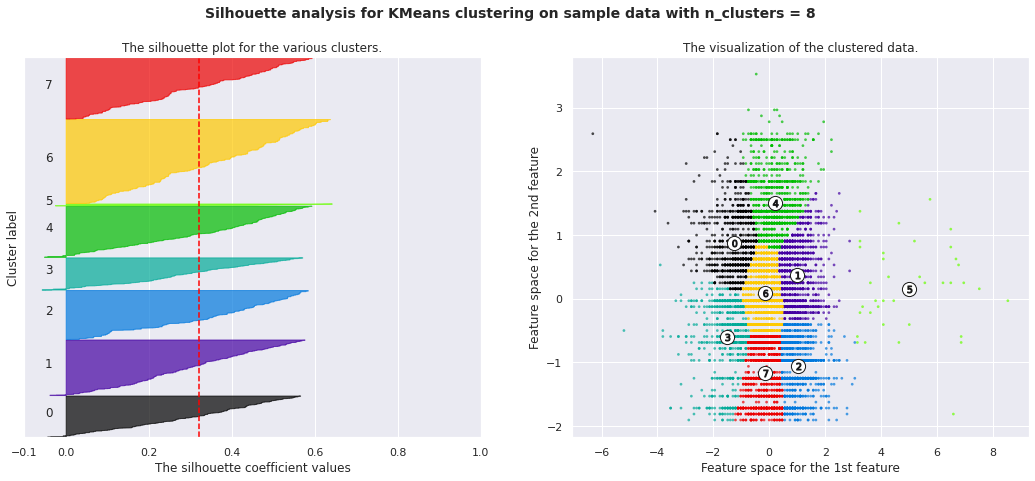

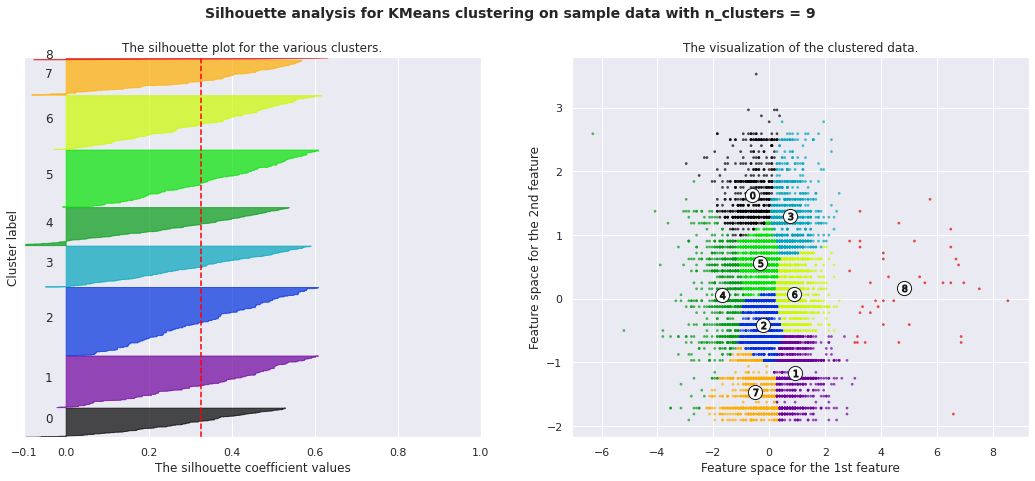

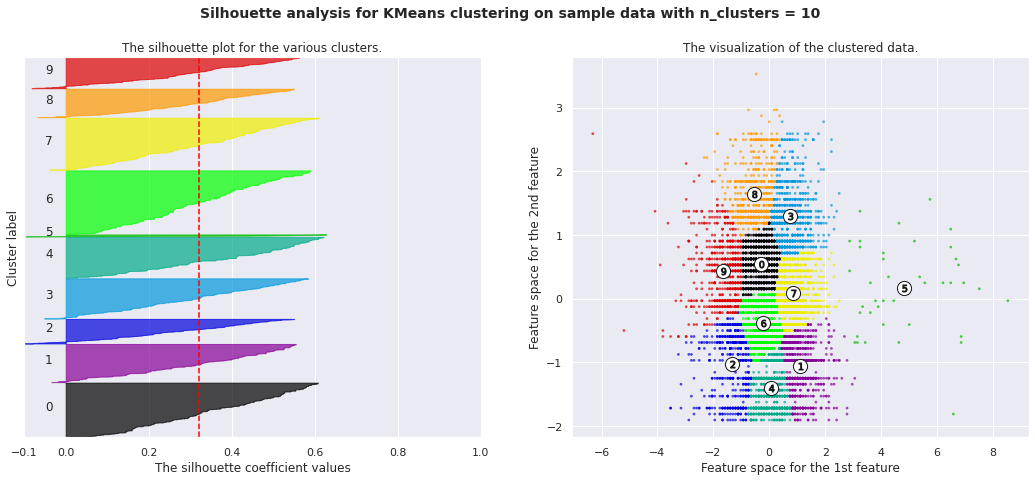

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
     # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

## K-means Clustering

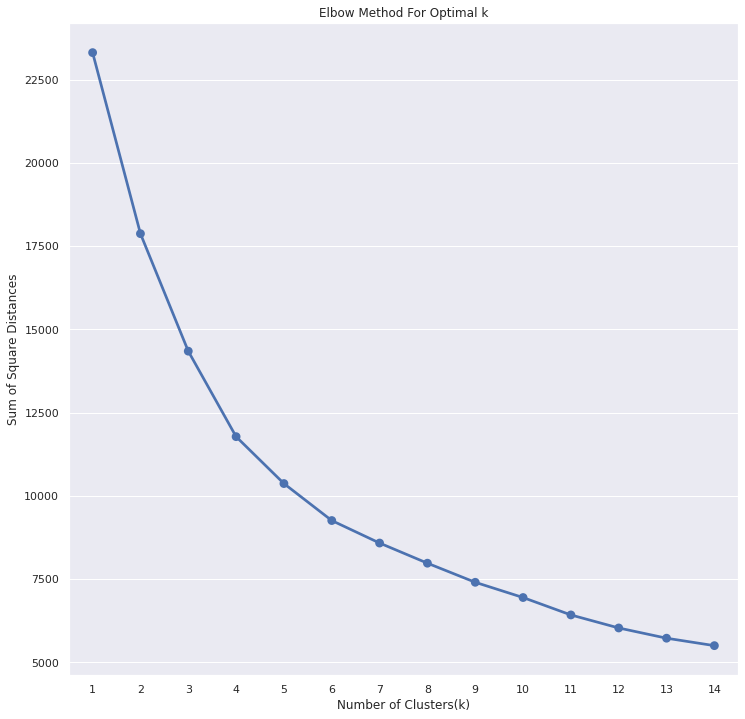

In [ ]:
X_features_rec_mon=df[['length','length_listed','year_added']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

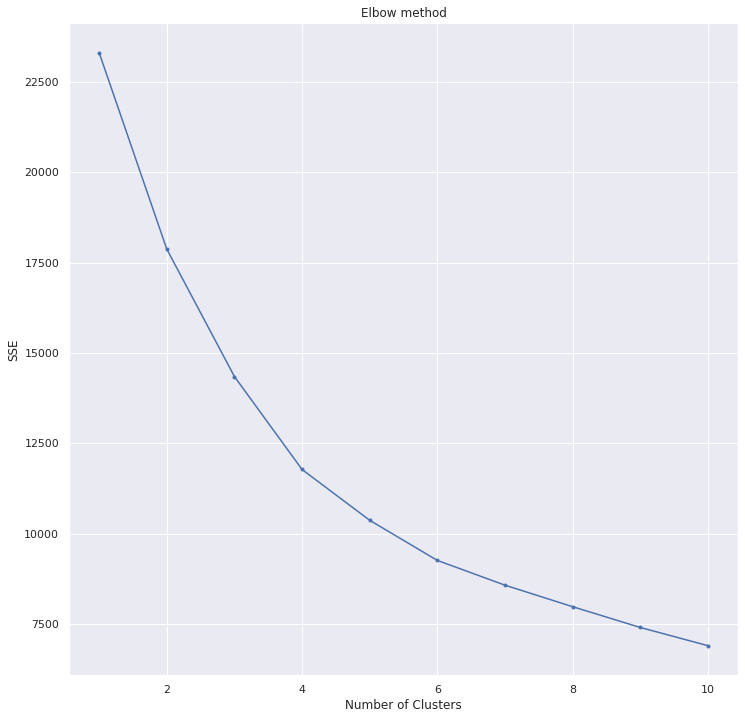

In [ ]:
# To help choose the number of clusters, elbow method:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse,'.-')
plt.grid(b=True)
#plt.xticks(range(1, 11))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Number of clusters(k) = 5 as it has the highest silhouette score and the error term i.e sum of square distance is between 7500 to 5000 which is acceptable.

In [84]:
#Kmeans clustering Implementation
Kmeans_clustersmodel= KMeans(n_clusters=5)
Kmeans_clustersmodel.fit(X)

KMeans(n_clusters=5)

In [85]:
#Predicting from model and also checking centres_Cluster in arrays
pred= Kmeans_clustersmodel.predict(X)
centres_Cluster= Kmeans_clustersmodel.cluster_centers_
centres_Cluster

array([[ 0.41283287, -0.76672787,  0.78364223],
       [ 0.07924445,  0.92855827, -0.89755432],
       [ 0.25692441,  0.99525531,  0.74260932],
       [-1.30328791, -0.04400536,  0.21501401],
       [ 0.4421028 , -0.82657928, -1.04609393]])

In [86]:
#now creating a new feature name as cluster in which each row of content feature is assigned to their separate cluster
df['cluster'] = Kmeans_clustersmodel.labels_

In [87]:
#head of df_clean_frame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,prime_country,year_added,month_added,age_wise_rating,count,length,length_listed,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,Brazil,2020,August,Adults,1,82,40,2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,Mexico,2016,December,Adults,1,88,17,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,Singapore,2018,December,Adults,1,102,23,4
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,United States,2017,November,Teens,1,89,43,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,United States,2020,January,Teens,1,99,5,0


In [88]:
number_of_clusters=df['cluster'].value_counts().reset_index()
number_of_clusters

,index,cluster
0,0,1818
1,4,1584
2,2,1517
3,3,1498
4,1,1353


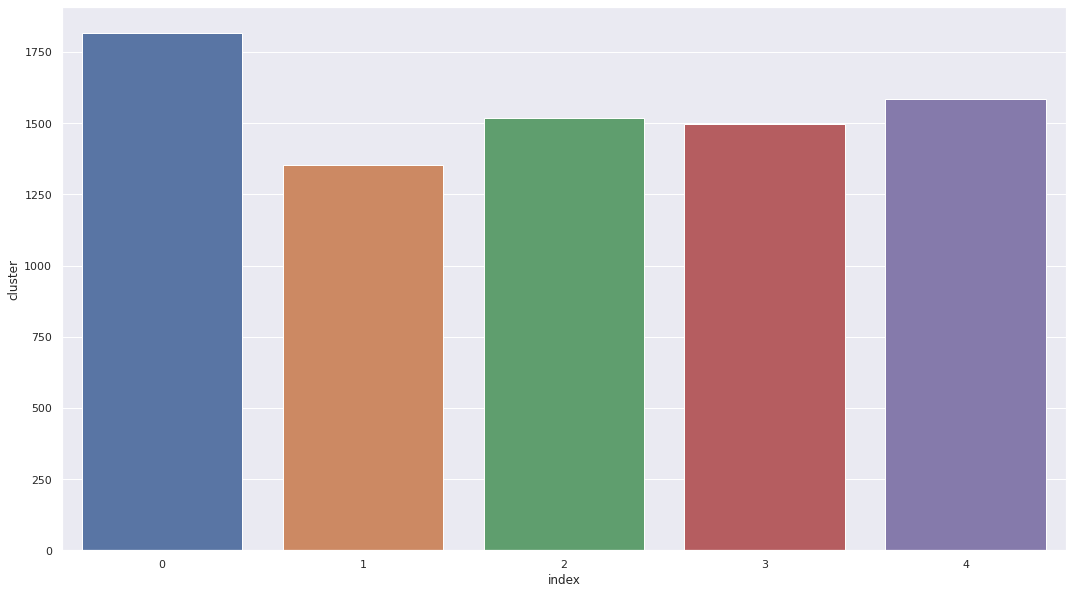

In [89]:
#checking the number of clusters
plt.figure(figsize=(18,10))
sns.barplot(x=number_of_clusters['index'],y=number_of_clusters['cluster'])

## Dendogram

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.2 MB/s 
     |████████████████████████████████| 357 kB 64.8 MB/s 


In [ ]:
!pip install jupyter_dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=dff696361ecd8b59d9ffc32cca14c7d9c1f39eb7d7cd63320c47c6a59bce2fda
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


We concluded the following points:



**1.   Netflix has increasingly focus on the movies than TV shows. It has been producing more movies than tv shows since after year 2014.**

**2.   Netflix is most popular in United States. India lie at 2 position in popularity list**

**3.   In most of the countries the content available on netflix is mostly of movie type except in Sounth Korea and Japan**

**4.   Clusttering was done using 'length','length_listed' and 'type' column**

**5.   Using elbow method and silhoutte score the best number of cluster turned out to be 5 with silhoutte score of 0.37 which is great indicating our clusters are homogeneous but heterogeneous to one another.**